<a href="https://colab.research.google.com/github/VidushiSharma31/predictive-maintainance/blob/main/ML_code/rul_and_failure_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Failure Prediction and Remaining Useful Life (RUL) Regression

### 1. Import Libraries

This cell imports necessary libraries for data manipulation, machine learning model building, and evaluation.
*   `pandas` and `numpy` are used for data handling and numerical operations.
*   `sklearn.model_selection.train_test_split` is for splitting data into training and testing sets.
*   `sklearn.preprocessing.StandardScaler` and `LabelEncoder` are used for feature scaling and encoding categorical labels.
*   `sklearn.metrics`: `mean_absolute_error`, `mean_squared_error`, `r2_score` for regression evaluation, and `accuracy_score`, `classification_report`, `confusion_matrix` for classification evaluation.
*   `sklearn.ensemble.RandomForestRegressor` is used for the RUL regression model.
*   `imblearn.over_sampling.SMOTE` is included to handle class imbalance by oversampling minority classes.
*   `tensorflow` and its `keras` submodule (`Sequential` for model building, `Dense`, `Dropout`, `BatchNormalization` for layers, `EarlyStopping` for callbacks) are used for constructing and training the deep learning classification model.
*   `seaborn` and `matplotlib.pyplot` are for data visualization.
*   `sklearn.utils.class_weight` helps compute weights for imbalanced classes.
*   `joblib` is used for saving and loading machine learning models and scalers.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import joblib

### 2. Load Data and Initial Preprocessing

This cell loads the dataset from an Excel file named "machine_failure_dataset.xlsx" into a pandas DataFrame. It then uses `LabelEncoder` from `sklearn.preprocessing` to convert the categorical 'Type' and 'Failure Type' columns into numerical representations. This is a common step before feeding categorical data into machine learning models.

In [ ]:
df = pd.read_excel("machine_failure_dataset.xlsx")
le_type = LabelEncoder()
le_fail = LabelEncoder()

df["Type"] = le_type.fit_transform(df["Type"])
df["Failure Type"] = le_fail.fit_transform(df["Failure Type"])

This cell defines the features and the target variable for the Remaining Useful Life (RUL) regression model. The features include various operational parameters and the encoded 'Type' of the machine. The target variable is 'RUL'. The data is then split into `X` (features) and `y` (target).

In [ ]:
features = [
    'Air temperature [K]', 'Process temperature [K]',
    'Rotational speed [rpm]', 'Torque [Nm]',
    'Vibration Levels', 'Operational Hours',
    'Type'
]
target = "RUL"

X = df[features]
y = df[target]

### 3. RUL Regression Model Training

This cell performs the train-test split for the RUL regression task using `train_test_split`. It then scales the numerical features using `StandardScaler` to normalize the data, which is crucial for many machine learning algorithms to perform optimally.

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

This cell trains a `RandomForestRegressor` model for predicting RUL. After training, it makes predictions on the test set (`X_test`). The model's performance is then evaluated using common regression metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

In [ ]:
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate RF
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results")
print(f"MAE: {rf_mae:.3f} | RMSE: {rf_rmse:.3f} | R²: {rf_r2:.3f}")

Random Forest Results
MAE: 5.642 | RMSE: 18.171 | R²: 0.886


This cell visualizes the performance of the Random Forest Regressor. A scatter plot is generated to show the relationship between the actual RUL values and the predicted RUL values. A good model would show points clustered closely around a diagonal line.

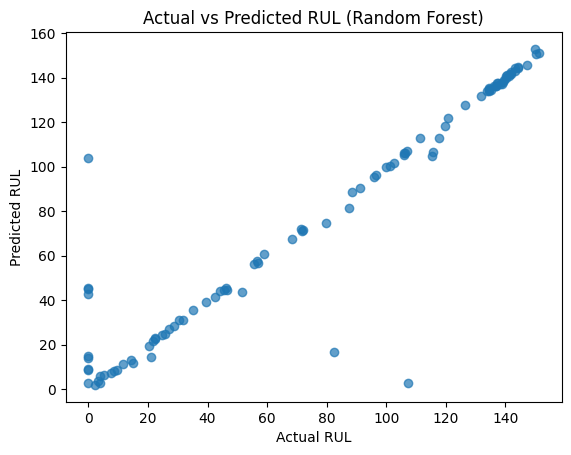

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL (Random Forest)")
plt.show()

### 4. Failure Type Classification Model Training

This cell prepares the data for a deep learning model aimed at classifying the 'Failure Type'. It defines the features and the target variable for this task. It then splits the data into training and testing sets (`X_train_dl`, `X_test_dl`, `y_train_dl`, `y_test_dl`) with stratification to ensure that the class distribution is maintained in both sets. Finally, it scales the features using `StandardScaler` for the deep learning model and prints the shapes of the processed data.

In [ ]:
# Define features and target for the deep learning model (Failure Type classification)
features_dl = [
    'Air temperature [K]', 'Process temperature [K]',
    'Rotational speed [rpm]', 'Torque [Nm]',
    'Vibration Levels', 'Operational Hours',
    'Type'
]
target_dl = "Failure Type"

X_dl = df[features_dl]
y_dl = df[target_dl]

# Train-test split for deep learning
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_dl, test_size=0.2, random_state=42, stratify=y_dl)

# Scale features for deep learning
scaler_dl = StandardScaler()
X_train_dl_scaled = scaler_dl.fit_transform(X_train_dl)
X_test_dl_scaled = scaler_dl.transform(X_test_dl)

# Display the shapes of the scaled data
print("Shape of X_train_dl_scaled:", X_train_dl_scaled.shape)
print("Shape of X_test_dl_scaled:", X_test_dl_scaled.shape)
print("Shape of y_train_dl:", y_train_dl.shape)
print("Shape of y_test_dl:", y_test_dl.shape)

Shape of X_train_dl_scaled: (400, 7)
Shape of X_test_dl_scaled: (100, 7)
Shape of y_train_dl: (400,)
Shape of y_test_dl: (100,)


This cell addresses potential class imbalance in the 'Failure Type' dataset using SMOTE (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic samples for minority classes to balance the class distribution, which can improve the performance of classification models.

In [ ]:
# Oversampling
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_dl_res, y_train_dl_res = smote.fit_resample(X_train_dl_scaled, y_train_dl)

This cell calculates class weights based on the resampled training data (`y_train_dl_res`). Class weights are used during model training to give more importance to underrepresented classes, further helping to mitigate the effects of class imbalance.

In [ ]:
# Class Weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_dl_res),
    y=y_train_dl_res
)
class_weights = dict(enumerate(class_weights))

This cell defines the architecture of the deep learning model using `tf.keras.models.Sequential`. The model consists of:
*   Two `Dense` layers with 'relu' activation, each followed by `BatchNormalization` (to stabilize training) and `Dropout` (to prevent overfitting).
*   An output `Dense` layer with 'softmax' activation, suitable for multi-class classification, where the number of units equals the number of unique failure types.

In [ ]:
# Define the model for classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_dl_res.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(len(np.unique(y_dl)), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This cell compiles the deep learning model.
*   It uses the Adam optimizer with a learning rate of 1e-3.
*   `SparseCategoricalCrossentropy` is chosen as the loss function, which is appropriate for integer-encoded target labels.
*   'accuracy' is specified as the metric to monitor during training.

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

This cell sets up `EarlyStopping`, a callback function that monitors a specified metric (here, 'val_loss') during training. If the monitored metric does not improve for a certain number of epochs (patience=10), training will stop early, and the model's weights from the best performing epoch will be restored. This helps prevent overfitting and saves training time.

In [ ]:
# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

This cell trains the deep learning classification model using the resampled training data.
*   It uses a validation split of 0.2 to monitor performance on unseen data during training.
*   The training runs for 100 epochs with a batch size of 32.
*   The calculated `class_weights` are passed to give appropriate importance to each class.

In [ ]:
# Train
history = model.fit(
    X_train_dl_res, y_train_dl_res,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    class_weight=class_weights,
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.2927 - loss: 1.8599 - val_accuracy: 0.0000e+00 - val_loss: 1.6364
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6413 - loss: 0.9797 - val_accuracy: 0.0667 - val_loss: 1.6536
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7087 - loss: 0.8008 - val_accuracy: 0.0667 - val_loss: 1.6261
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7794 - loss: 0.6393 - val_accuracy: 0.0933 - val_loss: 1.5930
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.5804 - val_accuracy: 0.1000 - val_loss: 1.5599
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8339 - loss: 0.5283 - val_accuracy: 0.1067 - val_loss: 1.5074
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8333 - loss: 0.4615 - val_accuracy: 0.1067 - val_loss: 1.4761
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8486 - loss: 0.4414 - val_accuracy: 0.160

### 5. Evaluate and Save Models

This cell evaluates the trained deep learning model on the scaled test set (`X_test_dl_scaled`, `y_test_dl`). It calculates and prints the test loss and test accuracy, providing a measure of the model's generalization performance on unseen data.

In [ ]:
# === Evaluate ===
test_loss, test_acc = model.evaluate(X_test_dl_scaled, y_test_dl, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 94.00%


This cell generates class predictions from the deep learning model. `model.predict()` returns probability distributions over the classes for each test sample. `np.argmax()` is then used to convert these probabilities into the predicted class labels (the class with the highest probability).

In [ ]:
pred_probs = model.predict(X_test_dl_scaled)
pred_classes = np.argmax(pred_probs, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


This cell decodes the numerical predicted and true class labels back into their original categorical 'Failure Type' names using the `le_fail` `LabelEncoder` that was fitted earlier. This makes the evaluation results more interpretable.

In [ ]:
# Decode the numeric predictions back to actual failure type names
decoded_predictions = le_fail.inverse_transform(pred_classes)
decoded_true = le_fail.inverse_transform(y_test_dl)

This cell is used to display the decoded failure types. It takes a sample array of numerical class labels `[0, 1, 2, 3]` and uses `le_fail.inverse_transform` to show what each number represents in terms of failure type. This is useful for understanding the mapping of the encoded labels.

In [ ]:
predicted_classes = np.array([0, 1, 2, 3])
decoded = le_fail.inverse_transform(predicted_classes)
print(decoded)

['No Failure' 'Overstrain Failure' 'Power Failure' 'Tool Wear Failure']


This cell prints the classification report, which provides a detailed breakdown of the deep learning model's performance for each class. It includes precision, recall, f1-score, and support, offering a comprehensive view of how well the model classifies each failure type.

In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_dl, pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         1
           3       0.67      0.50      0.57         4

    accuracy                           0.94       100
   macro avg       0.53      0.49      0.51       100
weighted avg       0.93      0.94      0.93       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


This cell generates and displays a confusion matrix using `seaborn.heatmap`. The confusion matrix visually represents the number of correct and incorrect predictions made by the classification model, showing where the model is performing well and where it might be struggling (e.g., confusing one failure type for another).

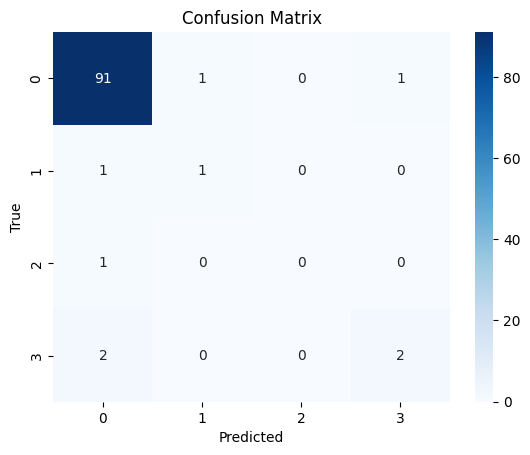

In [ ]:
# Print confusion matrix
cm = confusion_matrix(y_test_dl, pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

This cell saves the trained models and the `scaler` for future use.
*   The `failure_type_model` (deep learning model) is saved in H5 format using `model.save()`.
*   The `rul_rf_model` (Random Forest Regressor) is saved using `joblib.dump()`.
*   The `scaler_dl` used for feature scaling is also saved, which is crucial for making predictions on new, unseen data.

In [ ]:
# For Failure Type classifier
model.save("failure_type_model.h5")

# For RUL regression model
import joblib
joblib.dump(rf, "rul_rf_model.pkl")   # assuming Random Forest for RUL
joblib.dump(scaler_dl, "scaler.pkl")            # save the same scaler used for normalization

['scaler.pkl']